# **Group - 1**

Romy Savin Peter - S20190010153 (romysavin.p19@iiits.in)

Emma Mary Cyriac - S20190010048 (emmamary.c19@iiits.in)

Krushang Sirikonda - S20190010164 (krushang.s19@iiits.in)

Riya Rajesh - S20190010152 (riya.r19@iiits.in)

# **Clickbait Detector - Source Code (IPYNB)**

## Importing all libraries and packages required for proper functioning of the program.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import re
import pickle
from nltk.probability import FreqDist
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, recall_score
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.dummy import DummyClassifier
from wordcloud import WordCloud, STOPWORDS
import string
from matplotlib import style
from scipy import sparse

## Data Processing & Feature Engineering

Data cleaning and processing (will be done prior to modelling): 
- Punctuation, links and non-alphabetical characters were removed prior to EDA & Modeling. Numbers were left intact as clickbait headlines appear to use numbers frequently. 
- English stopwords were removed. 
- Each headline was tokenized (unigrams for initial EDA, unigrams & bigrams for modeling and further EDA) and all words were lowercased. 
- For modeling, TF-IDF scores were accessed for each unigram and bigram.

Feature Engineering (by hand): 
- headline_words: word count in a headline (before stopwords were removed).
- question: 1 for yes & 0 for no, if the headline started with a question word and/or included a '?' (before stopwords and punctuation were removed).
- exclamation: 1 if the headline includes an exclamation point, 0 if it does not (before punctuation was removed).
- starts_with_num: 1 if the headline starts with a number, 0 if it does not. 


## Exploratory Data Analysis
- Visualizing word frequency for each class.
- Visualizing distribution of engineered features and their relevance on each class.
- Target distribution is mostly balanced.

In [ ]:
df = pd.read_csv('with_engineeredfeat_data.csv',index_col=0)

n_file = open("headlines.txt", "r")
corp_use = n_file.read()

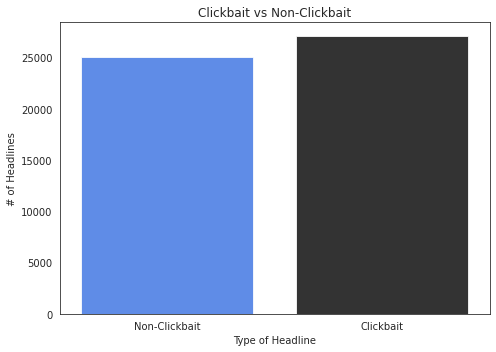

In [ ]:
#class variable countplot
#visualizing class frequency of dataset
sns.set_style('white')
plt.figure(figsize=(7,5))
fig1=sns.countplot(df['class'], alpha =.80, palette= ['#1a66ff','black'])
plt.title('Clickbait vs Non-Clickbait')
plt.ylabel('# of Headlines')
plt.xlabel('Type of Headline')
fig1.set(xticklabels=['Non-Clickbait','Clickbait'])
plt.tight_layout()
#plt.savefig('class_dist')
plt.show()


In [ ]:
#cleaning data to remove stopwords & tokenize text for EDA

def tokenize(text):
    text = [x.split() for x in text]
    return text

df.text  = tokenize(df.text)

stopwords_list = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

df.text = df['text'].apply(lambda x: [item for item in x if item not in stopwords_list])


In [ ]:
#creating seperate dataframes for each class
df_cb=df[df['class']==1]
df_noncb=df[df['class']==0]

#creating a list of unique words for each class
cb_list=list(df_cb['text'])

total_vocab_cb = set()
for word in cb_list:
    total_vocab_cb.update(word)
len(total_vocab_cb)

noncb_list=list(df_noncb['text'])

total_vocab_noncb = set()
for word in noncb_list:
    total_vocab_noncb.update(word)
len(total_vocab_noncb)

flat_cb = [item for sublist in cb_list for item in sublist]
flat_noncb = [item for sublist in noncb_list for item in sublist]


cb_freq = FreqDist(flat_cb)
noncb_freq = FreqDist(flat_noncb)

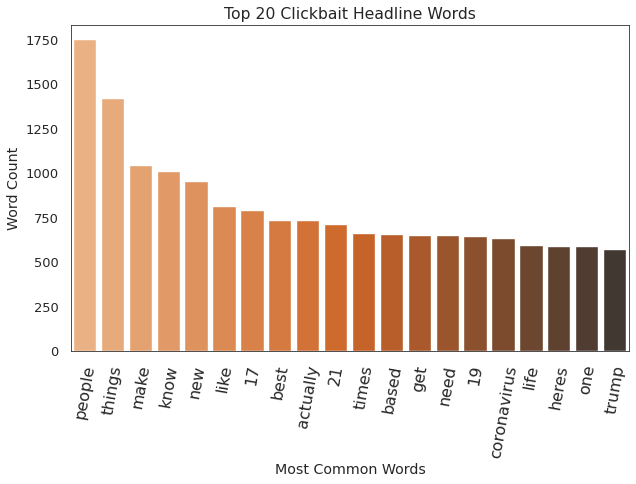

In [ ]:
# create counts of clickbait and non-clickbait words and values
cb_bar_counts = [x[1] for x in cb_freq.most_common(20)]
cb_bar_words = [x[0] for x in cb_freq.most_common(20)]

noncb_bar_counts = [x[1] for x in noncb_freq.most_common(20)]
noncb_bar_words = [x[0] for x in noncb_freq.most_common(20)]

plt.style.use('seaborn-talk')

#bar plot for top 15 most common clickbait words
word_freq_figure1 = plt.figure(figsize=(10,6))
sns.barplot(cb_bar_words, cb_bar_counts,palette='Oranges_d')
plt.xticks(fontsize=16)
plt.xticks(rotation=80)
plt.title('Top 20 Clickbait Headline Words')
plt.xlabel('Most Common Words')
plt.ylabel('Word Count')
sns.set_style('white')
plt.savefig('clickbait_20_bar')
plt.show()

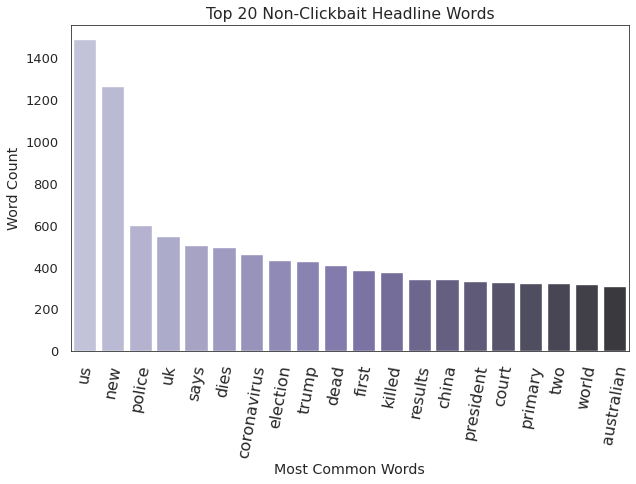

In [ ]:
#bar plot for top 15 most common non-clickbait words
word_freq_figure1 = plt.figure(figsize=(10,6))
sns.barplot(noncb_bar_words, noncb_bar_counts,palette='Purples_d')
plt.xticks(fontsize=16)
plt.xticks(rotation=80)
plt.title('Top 20 Non-Clickbait Headline Words')
plt.xlabel('Most Common Words')
plt.ylabel('Word Count')
sns.set_style()
plt.show()

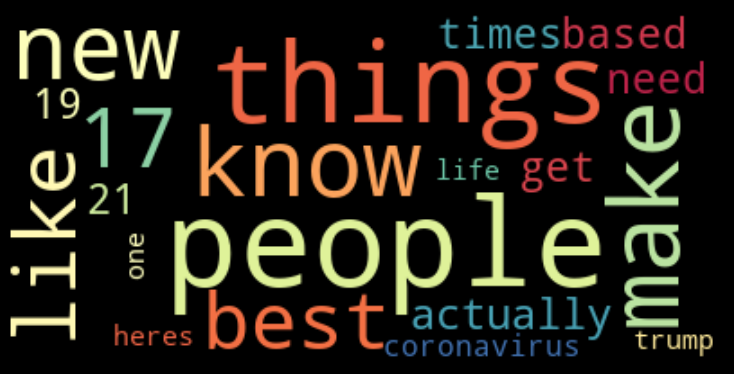

In [ ]:
# Getting data into a dictionary
# FORMAT:  dictionary = dict(zip(keys, values))
#!pip install wordcloud
from wordcloud import WordCloud
clickbait_dictionary = dict(zip(cb_bar_words, cb_bar_counts))
nonclickbait_dictionary = dict(zip(noncb_bar_words, noncb_bar_counts))

tfidf_text_train = sparse.load_npz("td_trn.npz")
tfidf_text_test = sparse.load_npz("td_tst.npz")

# Create the clickbait word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(clickbait_dictionary)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:

plt.savefig('clickbait_wc')

plt.show()

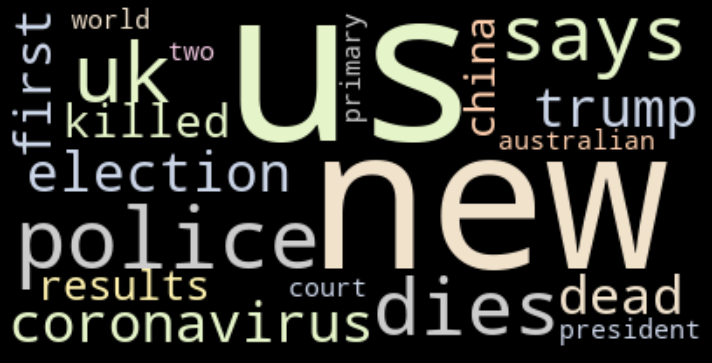

In [ ]:
# Create the non-clickbait word cloud:

wordcloud = WordCloud(colormap='Pastel2').generate_from_frequencies(nonclickbait_dictionary)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
plt.tight_layout()
plt.savefig('nonclickbait_wc')

plt.show()

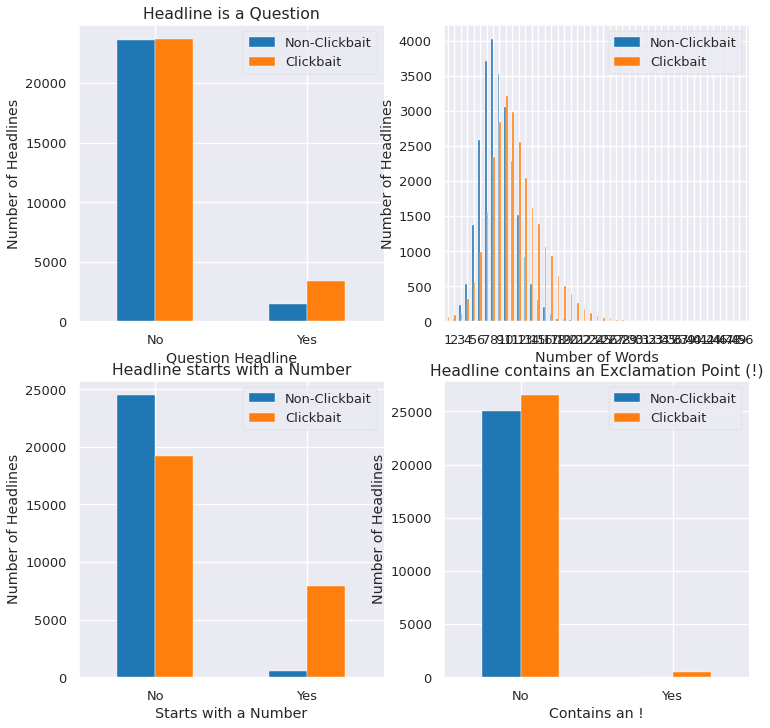

In [ ]:
#plotting engineered features to compare by class 
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

plot = df.groupby('question')['class'].value_counts().unstack().plot.bar(ax=axes[0,0], rot=0)
plot.set_xlabel('Question Headline')
plot.set_ylabel('Number of Headlines')
plot.legend(title=None,labels=['Non-Clickbait','Clickbait'])
plot.set(xticklabels=['No','Yes'])
plot.set_title('Headline is a Question')

plot = df.groupby('headline_words')['class'].value_counts().unstack().plot.bar(ax=axes[0,1], rot=0)
plot.set_xlabel('Number of Words')
plot.set_ylabel('Number of Headlines')
plot.legend(title=None,labels=['Non-Clickbait','Clickbait'])


plot = df.groupby('starts_with_num')['class'].value_counts().unstack().plot.bar(ax=axes[1,0], rot=0)
plot.set_xlabel('Starts with a Number')
plot.set_ylabel('Number of Headlines')
plot.legend(title=None,labels=['Non-Clickbait','Clickbait'])
plot.set(xticklabels=['No','Yes'])
plot.set_title('Headline starts with a Number')

plot = df.groupby('exclamation')['class'].value_counts().unstack().plot.bar(ax=axes[1,1], rot=0)
plot.set_xlabel('Contains an !')
plot.set_ylabel('Number of Headlines')
plot.legend(title=None,labels=['Non-Clickbait','Clickbait'])
plot.set(xticklabels=['No','Yes'])
plot.set_title('Headline contains an Exclamation Point (!)')

style.use('ggplot')
plt.show()



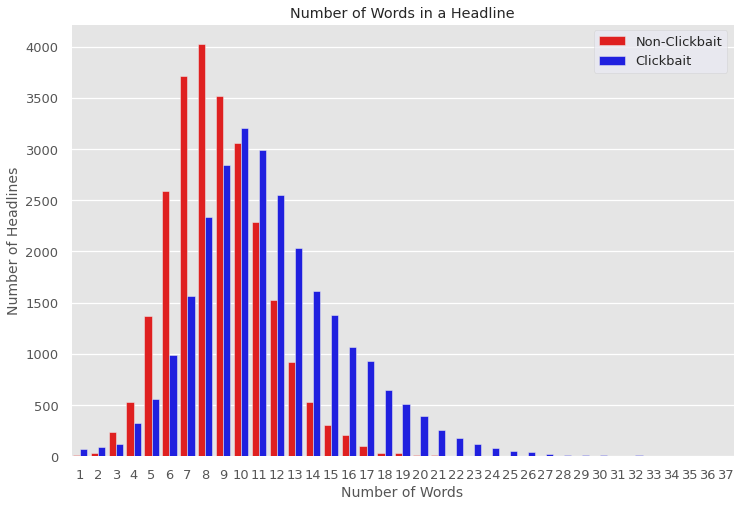

In [ ]:
#replotting headline word comparison plot with smaller range

df_words = df[df['headline_words'] < 38]

sns.countplot(df_words['headline_words'],hue=df_words['class'],palette=['red','blue'],data=df_words)
sns.set_style('darkgrid')
plt.xlabel('Number of Words',size=14)
plt.ylabel('Number of Headlines', size=14)
plt.legend(title=None,labels=['Non-Clickbait','Clickbait'],loc='upper right')
plt.title('Number of Words in a Headline')
plt.tight_layout()
plt.savefig('num_words_comparison')

plt.show()

In [ ]:
engineered_feats=df.drop(columns='text')
engineered_feats.corr()

,class,question,exclamation,starts_with_num,headline_words
class,1.000000,0.117118,0.079931,0.366345,0.361940
question,0.117118,1.000000,0.003738,-0.129655,-0.040834
exclamation,0.079931,0.003738,1.000000,-0.038586,0.000258
starts_with_num,0.366345,-0.129655,-0.038586,1.000000,0.015247
headline_words,0.361940,-0.040834,0.000258,0.015247,1.000000


## Modeling
- Evaluation is done using accuracy and recall, mostly emphasizing recall to minimize false negatives (labeling an article as not clickbait when it is). 

In [ ]:
#reading in cleaned dataframe with engineered features
#will tokenize & remove stopwords with TFIDF
df = pd.read_csv('with_engineeredfeat_data.csv',index_col=0)

In [ ]:
df.shape

(52127, 6)

In [ ]:
#Create stopwords list
stopwords_list = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

#definining y and features
features = df.drop(columns='class')
y = df['class']

#classes are mostly balanced
y.value_counts()

1    27070
0    25057
Name: class, dtype: int64

### Setting up for modeling
- Performing the train/test split
- Creating function for evaluating results & measure accuracy of each model

- Applying TF-IDF transformation to headline text and understanding the importance of words in relation to corpus for both clickbait and non-clickbait titles.
- TF-IDF is done after vectorizing and n-grams (specifically, unigrams & bigrams) are generated for the headlines along with removal of stopwords.



In [ ]:
#first splitting data for test/train sets 
#ngram range -> unigrams and bigrams 
X_train, X_test, y_train, y_test = train_test_split(features, y, random_state=20)

def generate_ngrams(s, n):
    # Convert to lowercases
    s = s.lower()
    
    # Replace all none alphanumeric characters with spaces
    s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    
    # Break sentence in the token, remove empty tokens
    tokens = [token for token in s.split(" ") if token != ""]
    
    # Use the zip function to help us generate n-grams
    # Concatentate the tokens into ngrams and return
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

bowA = generate_ngrams(corp_use, 1)
bowB = generate_ngrams(corp_use, 2)

wordSet = set(bowA).union(set(bowB))

wordDictA = dict.fromkeys(wordSet, 0) 
wordDictB = dict.fromkeys(wordSet, 0) 

for word in bowA:
    wordDictA[word]+=1
    
for word in bowB:
    wordDictB[word]+=1

pd.DataFrame([wordDictA, wordDictB])

#computes the TF score for each word in the corpus, by document.
def computeTF(wordDict, bow):
    tfDict = {}
    bowCount = len(bow)
    for word, count in wordDict.items():
        tfDict[word] = count/float(bowCount)
    return tfDict

tfBowA = computeTF(wordDictA, bowA)
tfBowB = computeTF(wordDictB, bowB)

#computes the IDF score of every word in the corpus.
def computeIDF(docList):
    import math
    idfDict = {}
    N = len(docList)
    
    idfDict = dict.fromkeys(docList[0].keys(), 0)
    for doc in docList:
        for word, val in doc.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        idfDict[word] = math.log10(N / float(val))
        
    return idfDict    

idfs = computeIDF([wordDictA, wordDictB])

# function below computes the TF-IDF score for each word, by multiplying the TF and IDF scores.
def computeTFIDF(tfBow, idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val*idfs[word]
    return tfidf

tfidfBowA = computeTFIDF(tfBowA, idfs)
tfidfBowB = computeTFIDF(tfBowB, idfs)

pd.DataFrame([tfidfBowA, tfidfBowB])

a_file = open("hdl-tfidf-unigram.pkl", "wb")
pickle.dump(tfidfBowA, a_file)
a_file.close()

b_file = open("hdl-tfidf-bigram.pkl", "wb")
pickle.dump(tfidfBowB, b_file)
b_file.close()

X_train_ef = X_train.drop(columns='text')
X_test_ef = X_test.drop(columns='text')

In [ ]:
#combine tf-idf vectors with the engineered features and store as sparse arrays
X_train = sparse.hstack([X_train_ef, tfidf_text_train]).tocsr()
X_test = sparse.hstack([X_test_ef, tfidf_text_test]).tocsr()


In [ ]:
print(X_train.shape)
print(X_test.shape)

(39095, 203136)
(13032, 203136)


In [ ]:
#creating a function to call after each model iteration to print accuracy and recall scores for test and train
def train_results(preds):
    return "Training Accuracy:", accuracy_score(y_train,preds)," Training Recall:", recall_score(y_train,preds)

def test_results(preds):
    return "Testing Accuracy:", accuracy_score(y_test,preds)," Testing Recall:", recall_score(y_test,preds)

### Dummy Classifier 
- It is a baseline model.
- Predicts the majority class.

In [ ]:
#baseline model to predict majority class
dc_classifier = DummyClassifier(strategy='most_frequent')

dc_classifier.fit(X_train, y_train)

dc_train_preds = dc_classifier.predict(X_train)
dc_test_preds = dc_classifier.predict(X_test)

print(train_results(dc_train_preds))
print(test_results(dc_test_preds))

('Training Accuracy:', 0.5179946284691137, ' Training Recall:', 1.0)
('Testing Accuracy:', 0.5232504604051565, ' Testing Recall:', 1.0)


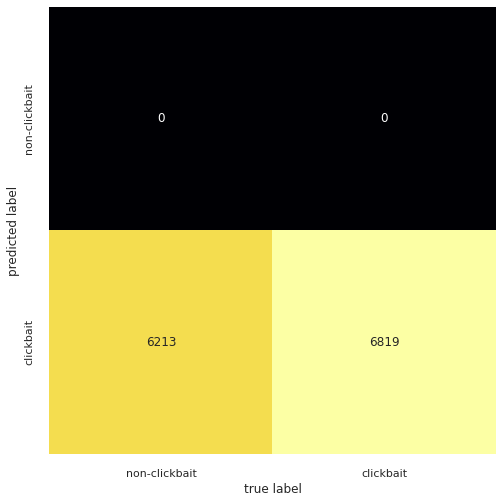

In [ ]:
#plot confusion matrix on test set Dummy Classifier
sns.set()

cm_dc = confusion_matrix(y_test, dc_test_preds)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="inferno", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.tight_layout()
plt.savefig('dc_cm')

### Naive Bayes
- Performs much better than dummy classifier.
- Alpha adjusted to maximize accuracy & recall.

In [ ]:
nb_classifier = MultinomialNB(alpha = .05)

nb_classifier.fit(X_train, y_train)

nb_train_preds = nb_classifier.predict(X_train)
nb_test_preds = nb_classifier.predict(X_test)

print(train_results(nb_train_preds))
print(test_results(nb_test_preds))

('Training Accuracy:', 0.9986699066376774, ' Training Recall:', 0.9992099155597255)
('Testing Accuracy:', 0.9300184162062615, ' Testing Recall:', 0.9416336706261915)


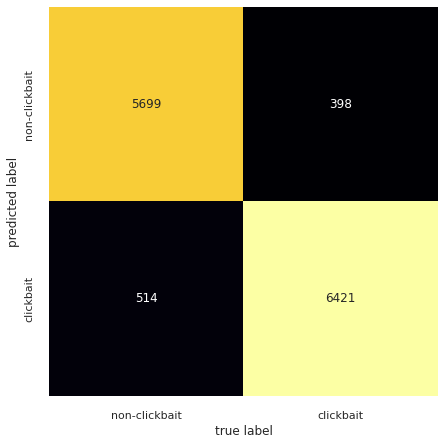

In [ ]:
#plot confusion matrix on test set NB Classifier
sns.set()

cm_dc = confusion_matrix(y_test, nb_test_preds)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="inferno", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig('nb_cm')
plt.show()

### Random Forest
- Peforms overfitting to training set.
- Tuned via Gridsearch.
- Accuracy and recall are lower compared to NB.

In [ ]:
#rf_classifier = RandomForestClassifier(class_weight = 'balanced', n_estimators = 900 )
rf_classifier = RandomForestClassifier(class_weight = 'balanced', n_estimators=900, )
rf_classifier.fit(X_train, y_train)

rf_test_preds = rf_classifier.predict(X_test)
rf_train_preds = rf_classifier.predict(X_train)

print(train_results(rf_train_preds))
print(test_results(rf_test_preds))

('Training Accuracy:', 1.0, ' Training Recall:', 1.0)
('Testing Accuracy:', 0.9074585635359116, ' Testing Recall:', 0.9335679718433788)


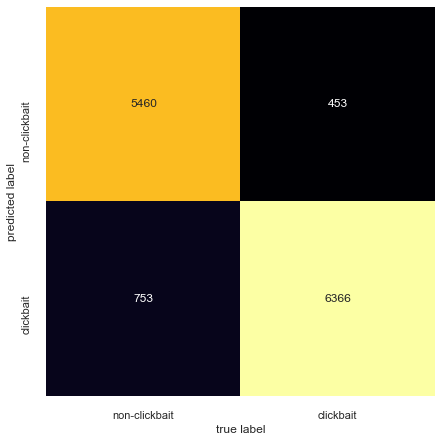

In [ ]:
#plot confusion matrix on test set RFC Classifier (no grid search)
sns.set()

cm_dc = confusion_matrix(y_test, rf_test_preds)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="inferno", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

### SVM
- Linear SVC classifier.
- Performs better than random forest.
- Accuracy is slighly better than NB but recall is slighly worse.

('Training Accuracy:', 0.999872106407469, ' Training Recall:', 0.9997530986124142)
('Testing Accuracy:', 0.9326273787599755, ' Testing Recall:', 0.9266754656107934)


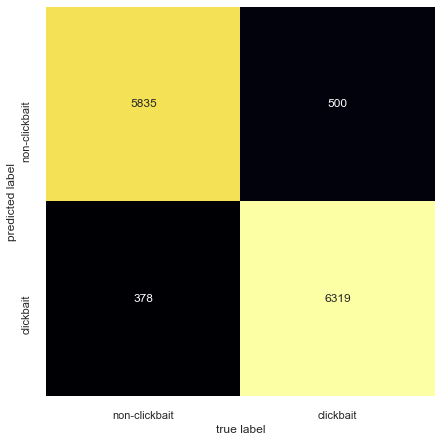

In [ ]:
#SVM Model

svm_classifier = LinearSVC(class_weight='balanced', C=10, max_iter = 1500 )

svm_classifier.fit(X_train, y_train)

svm_test_preds = svm_classifier.predict(X_test)
svm_train_preds = svm_classifier.predict(X_train)

print(train_results(svm_train_preds))
print(test_results(svm_test_preds))

#plot confusion matrix on test set SVM Classifier 
sns.set()

cm_dc = confusion_matrix(y_test, svm_test_preds)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="inferno", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

### Logistic Regression 
- Performance is pretty close to the SVM metrics.
- Accuracy is also slightly better than NB but recall is slightly worse.


('Training Accuracy:', 0.999872106407469, ' Training Recall:', 0.9997530986124142)
('Testing Accuracy:', 0.9310159607120934, ' Testing Recall:', 0.9241824314415603)


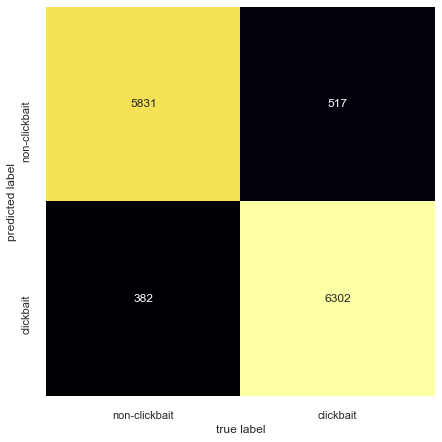

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=500, class_weight = 'balanced', solver = 'liblinear', tol=0.0001)

lr.fit(X_train,y_train)

lr_train_preds = lr.predict(X_train)
lr_test_preds = lr.predict(X_test)

print(train_results(lr_train_preds))
print(test_results(lr_test_preds))

#plot confusion matrix on test set lr Classifier 
sns.set()

cm_dc = confusion_matrix(y_test, lr_test_preds)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="inferno", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.savefig('lr_cm')

### XGBoost 
- It runs an out of box model.
- Performs the worst out of all other models.


('Testing Accuracy:', 0.8566605279312461, ' Testing Recall:', 0.8558439653908197)
('Training Accuracy:', 0.8834122010487274, ' Training Recall:', 0.8654387437657399)


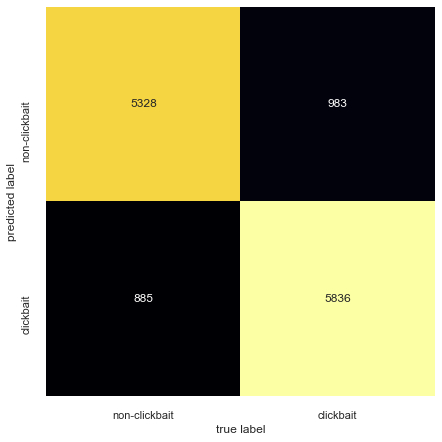

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
xgb_test_preds = xgb_clf.predict(X_test)
xgb_train_preds = xgb_clf.predict(X_train)

#print(train_results(lr_train_preds))
print(test_results(xgb_test_preds))
print(train_results(xgb_train_preds))

#plot confusion matrix on test set xgboost Classifier 
sns.set()

cm_dc = confusion_matrix(y_test, xgb_test_preds)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="inferno", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

### Model Interpretations
- Visualize NB coefficients.
- Visualize SVM coefficients.
- Visualize Logistic Regression coefficients.

In [ ]:
#NB coefficients
#creating dataframe for NB coefficients to evaluate the highest/lowest coefficients
coef_nb = pd.DataFrame(nb_classifier.coef_)
#coef_svm.sort_values(by=0,ascending=False).head(20)
coef_df_nb=coef_nb.T

#creating EF name list
engf_name_list=list(X_train_ef.columns)

#creating all feature names list with engineered features and tfidf names
all_feat_names_2 = []

for i in engf_name_list:
    all_feat_names_2.append(i)

for i in tfidf.get_feature_names():
    all_feat_names_2.append(i)
    
#creating column for feat names
coef_df_nb['tokens']=all_feat_names_2

coef_df_nb.set_index('tokens',inplace=True)



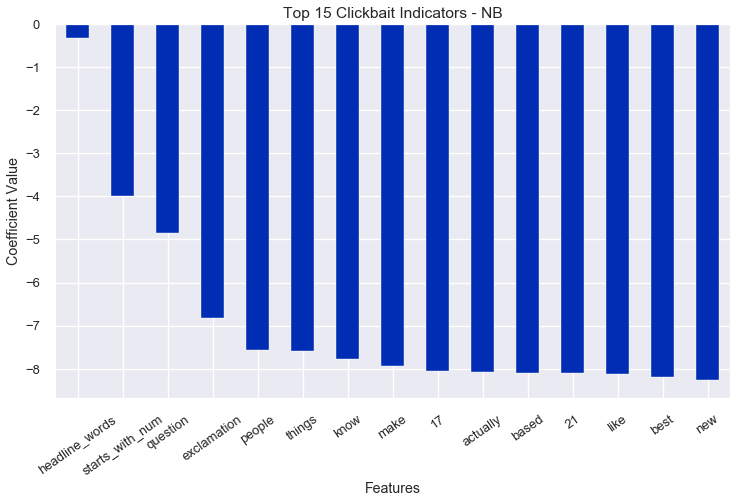

In [ ]:
#top 15 coefficients for non-clickbait
plt.style.use('seaborn-talk')

coef_df_nb[0].sort_values(ascending=False).head(15).plot(kind='bar',color='#002db3')
plt.title("Top 15 Clickbait Indicators - NB")
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=35)
plt.tight_layout()
plt.savefig('CB_coefs_nb')
sns.set_style('darkgrid')
plt.show()

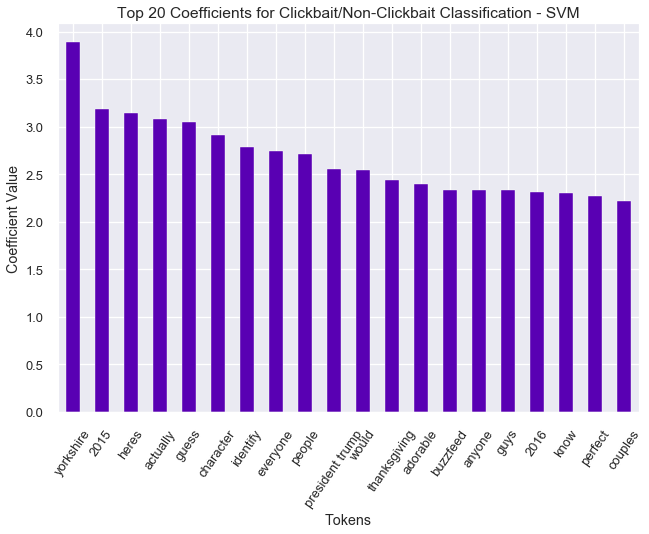

In [ ]:
#SVM interpretations 


#svm coefficients
#creating dataframe for SVM coefficients to evaluate the highest coefficients
coef_svm = pd.DataFrame(svm_classifier.coef_)
#coef_svm.sort_values(by=0,ascending=False).head(20)
coef_df_svm=coef_svm.T

coef_df_svm['tokens']=all_feat_names_2
coef_df_svm.set_index('tokens',inplace=True)

coef_df_svm[0].sort_values(ascending=False).head(20).plot(kind='bar',color='#5900b3')
plt.title("Top 20 Coefficients for Clickbait/Non-Clickbait Classification - SVM")
plt.xlabel('Tokens')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=55)
plt.show()

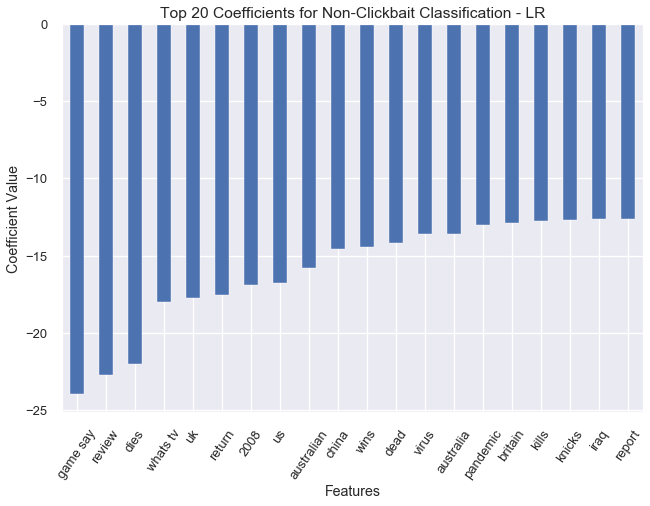

In [ ]:
#logistic regression interpretation 

#lr.coef_

#creating dataframe for SVM coefficients to evaluate the highest coefficients
coef_lr = pd.DataFrame(lr.coef_)
#coef_svm.sort_values(by=0,ascending=False).head(20)
coef_df_lr=coef_lr.T
coef_df_lr['tokens']=all_feat_names_2

coef_df_lr.set_index('tokens',inplace=True)

#plot non-cb 
coef_df_lr[0].sort_values(ascending=True).head(20).plot(kind='bar')
plt.title("Top 20 Coefficients for Non-Clickbait Classification - LR")
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=55)
plt.savefig('noncb_lr_coeff')
plt.show()

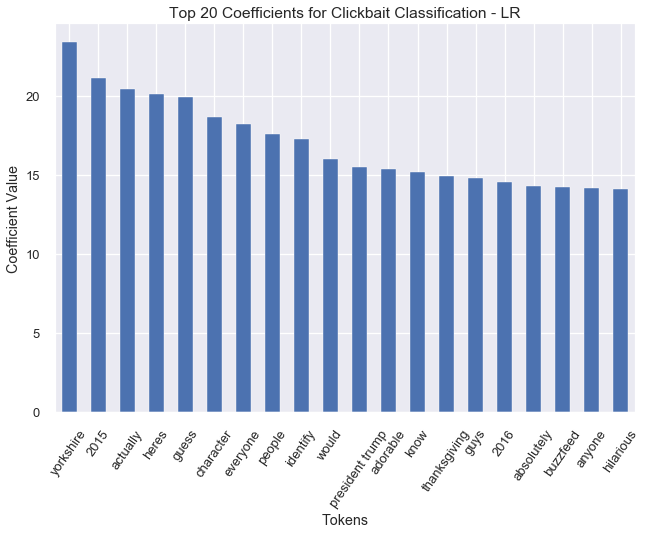

In [ ]:
#plot CB classification
coef_df_lr[0].sort_values(ascending=False).head(20).plot(kind='bar')
plt.title("Top 20 Coefficients for Clickbait Classification - LR")
plt.xlabel('Tokens')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=55)
plt.show()

## Conclusion

We were able to use ML algorithms such as Naive Bayes, Logistic regression and SVM coupled with NLP techniques like Tokenization, Vectorization, N Gram, Removing Stopwords, Keyword Exraction (TF-IDF) to accurately classify clickbait versus non-clickbait headlines. The results were appreciable -  within the 90-93% range for accuracy scores and 90-93% range for recall scores. We slightly prioritized recall it would be more valuable to minimize false negatives (classifying clickbait as non-clickbait).

As it was able to work pretty well relatively speaking, there is definitely a real world use case for a much scaled up solution to filter out / flag clickbait before a reader even has to visualize and discern the headline for themselves! By analyzing the coefficients of the models that performed the best, our group was able to interpret and get some insight into how the models determined if a headline is clickbait or not. 

## Scope of Improvement: 
- Explore deep NLP and NeuralNet models to see if they make a stronger classifier 
- Set up a Frontend or app using Flask to predict on new headlines in a current day scenario  
-Analyze topics and themes with LDA 
- Possibly try using LDA topics for modeling 
- Test the model on a new dataset